K-평균 군집화(K-means clustering) : 비슷한 속성끼리 분류하기

목표: 데이터들을 비슷한 속성끼리 분류

via 최효원's Jupyter Notebook

첫 번째 데이터는 변수들에 의미가 없는, 단순 학습 목적으로 만들어진 인위적 데이터,
두 번째 데이터는 LightGBM 모델링 작업 시 사용한 고객 데이터 중, 일부 변수와 정보를 담은 데이터셋입니다.

데이터를 적절한 수의 그룹으로 나누고, 그룹의 특징을 살펴볼 수 있는 K-means cluster 알고리즘을
해당 작업에 사용했습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data 1(단순 학습 데이터)

df = pd.read_csv('https://raw.githubusercontent.com/snkn1959/data_source/main/example_cluster.csv')
#데이터 출처 : https://raw.githubusercontent.com/snkn1959/data_source

In [2]:
df
#total : 1000 rows / 2 cols

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
...,...,...
995,4.678232,7.704404
996,5.250715,6.930948
997,-11.818752,-5.609853
998,0.613725,3.809334


<AxesSubplot:xlabel='var_1', ylabel='var_2'>

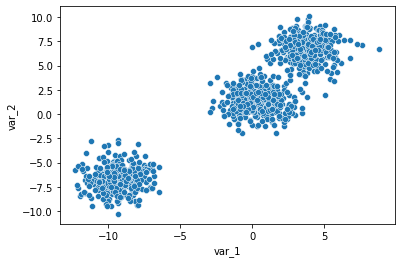

In [4]:
sns.scatterplot(x = 'var_1', y = 'var_2', data = df)
#데이터를 산점도를 활용한 시각화

*한 눈에 보기에도 데이터가 크게 3가지 그룹으로 나뉘어 있습니다.

*사람의 눈으로 인지되는대로, K-means clustering 을 이용해 3개 그룹으로 나누는 작업을 진행했습니다.

In [6]:
from sklearn.cluster import KMeans
#import

md = KMeans(n_clusters = 3, random_state = 100)
#n_clusters = 3 으로 지정
md.fit(df)
#학습

KMeans(n_clusters=3, random_state=100)

In [7]:
md.predict(df)
#예측

array([1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,

In [8]:
df['label'] = md.predict(df)
#예측값을 label 컬럼으로 지정

<AxesSubplot:xlabel='var_1', ylabel='var_2'>

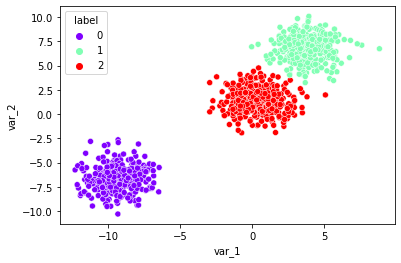

In [10]:
sns.scatterplot(x = 'var_1', y = 'var_2', data = df, hue = 'label',\
               palette = 'rainbow')
#hue(범례) 를 label 로 지정 후, 산점도 시각화

In [11]:
md.inertia_

3090.033237076661

*inertia : 각 그룹에서의 중심과 각 그룹에 해당하는 데이터 간 거리에 대한 합

*해당 값이 작을수록 그룹별로 더 오밀조밀 잘 모이게 분류됐다고 할 수 있습니다.

*작을수록 좋다고 할 수 있으나, n_clusters(K) 값이 커지면 거리의 합(inertia) 는 필연적으로 작아지게 됩니다,
따라서 적절한 K 값 지정이 필요하다고 할 수 있습니다.

In [12]:
#solution : elbow method

distance = []
#빈 리스트 생성
for k in range(2,10):
    #n_clusters 값 순회
    md = KMeans(n_clusters = k)
    #객체 생성
    md.fit(df)
    #학습
    distance.append(md.inertia_)
    #inertia 를 리스트에 저장

In [13]:
distance

[9908.551424778394,
 3090.033237076661,
 2719.9541000928593,
 2380.3839869988174,
 2067.0692306618316,
 1810.40461547221,
 1583.946785154165,
 1371.2149193828936]

<AxesSubplot:>

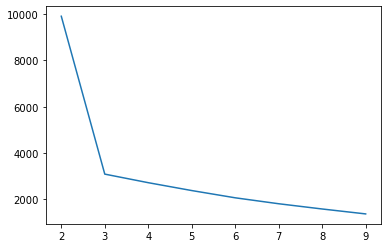

In [14]:
sns.lineplot(x = range(2,10), y = distance)
#elbow method 시각화(선형그래프)

*K 값이 커짐에 따라 distance y 는 점점 작아지는 모양입니다.

*유독 급격히 각도가 변화하는 지점을 확인할 수 있습니다(K = 3).

*이와 같이, elbow method 를 활용하여 distance 가 급격히 줄어드는 K 값을 포착해 최적의 군집 수를 찾을 수 있습니다.

In [2]:
#Data 2(고객 구매내역 데이터)

customer = pd.read_csv('https://raw.githubusercontent.com/snkn1959/data_source/main/customer.csv')
#데이터 출처 : https://raw.githubusercontent.com/snkn1959/data_source
customer.head()
#카드번호(id) #구매내역 범주 #거래 금액

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [4]:
customer.info()
#total : 240454 rows / 3 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    240454 non-null  int64  
 1   category  240454 non-null  object 
 2   amt       240454 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [17]:
customer['cc_num'].nunique()
#카드번호 고윳값 확인

100

In [18]:
customer['category'].nunique()
#구매내역 범주 고윳값 확인

11

*각 고객이 어떤 범주에 얼만큼 지불했는지 계산 후, K-means clustering 을 활용해 비슷한 특성을 가진 고객끼리 묶는 작업을 진행했습니다.

* 데이터 전처리

In [19]:
customer_dummy = pd.get_dummies(customer, columns = ['category'])
#더미 변수로 변환
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,1,0,0,0
1,630423337322,107.23,0,0,0,1,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,1,0,0,0


*범주별로 얼만큼의 금액을 썼는지 계산을 위해, 더미 변수로 변환된 영역에 amt(거래 금액) 변수값을 곱해 계산했습니다.

In [20]:
cat_list = customer_dummy.columns[2:]
#구매내역 범주 더미 컬럼 분리

for i in cat_list:
    #순회
    customer_dummy[i] = customer_dummy[i] * customer_dummy['amt']
    #더미 컬럼(0 또는 1) 에 거래 금액 곱셈 작업

In [26]:
len(customer_dummy)

240454

In [22]:
agg = customer_dummy.groupby('cc_num').sum()
#cc_num(카드번호) 별 총 금액

In [23]:
agg.head()
#상위 5행 확인

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


*KNN, K-means clustering -> 거리 기반 알고리즘이기 때문에, 데이터 스케일의 영향을 받습니다.

*StandardScaler 를 사용해 스케일링 작업을 진행했습니다.

In [28]:
from sklearn.preprocessing import StandardScaler
#import
sc = StandardScaler()
#스케일러 객체 생성
scaled = pd.DataFrame(sc.fit_transform(agg), columns = agg.columns,\
                     index = agg.index)
#스케일링 후 데이터프레임으로 변환

In [29]:
scaled.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


<AxesSubplot:>

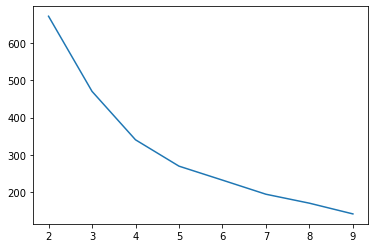

In [30]:
#elbow method 활용

distance = []
for k in range(2,10):
    md = KMeans(n_clusters = k)
    md.fit(scaled)
    labels = md.predict(scaled)
    distance.append(md.inertia_)

sns.lineplot(x = range(2,10), y = distance)

*어느 한 지점에서 크게 떨어지지 않고 비교적 완만하게 그래프가 내려가고 있습니다(K 값을 결정하기 어렵습니다).

*solution : 실루엣 계수(silhouette coefficient)

클러스터 내부에서의 평균 거리, 최근접한 다른 클러스터 데이터와의 평균 거리를 점수에 반영

최적 군집 수를 찾는 또다른 방법으로, elbow method 의 대안이 될 수 있습니다.

In [31]:
from sklearn.metrics import silhouette_score
#import

s = []
#실루엣 계수를 담을 리스트 생성
for k in range(2,10):
    #순회
    md = KMeans(n_clusters = k)
    md.fit(scaled)
    #학습
    labels = md.predict(scaled)
    #예측
    s.append(silhouette_score(scaled, labels))
    #실루엣 계수를 리스트에 추가

<AxesSubplot:>

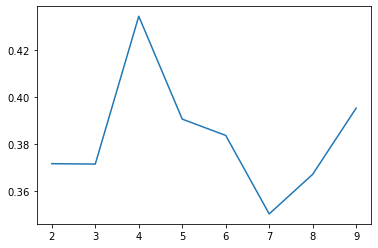

In [32]:
sns.lineplot(x = range(2,10), y = s)

*점수가 높을수록 더 좋은 분류를 의미한다고 할 수 있습니다. n_clusters = 4 일때, 모델이 가장 좋은 분류 성능을 냅니다.

In [33]:
#n_clusters = 4 적용
md = KMeans(n_clusters = 4)
md.fit(scaled)
labels = md.predict(scaled)
labels

array([0, 1, 3, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 2, 3, 3, 0, 1, 3, 1, 1, 3, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 1, 0, 2,
       3, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int32)

In [34]:
scaled['label'] = labels
#label 을 데이터셋에서 별도의 컬럼으로 생성

In [35]:
scaled_mean = scaled.groupby('label').mean()
#label 별 평균값
scaled_count = scaled.groupby('label').count()['category_travel']
#label 별 등장 횟수

In [37]:
scaled_count = scaled_count.rename('count')

In [38]:
scaled = scaled_mean.join(scaled_count)
#join
scaled

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604,45
1,0.311574,0.149105,0.212407,1.025558,0.109070,0.452339,0.369237,0.716395,0.378376,0.470040,0.010316,-0.264410,37
2,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10
3,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8


*군집0, 45명 - 전체 지출액, 각 범주 금액까지 모두 다른 군집에 비해 낮은 고객군

*군집1, 37명 - gas_transport 에서 상대적으로 높은 지출을 보이지만, 딱히 특징이 없는 일반 고객군

*군집2, 10명 - 전체 지출금액, 대다수의 범주에서 높은 지출을 보이는 상위 10% VIP 고객군

*군집3, 8명 - health, home, travel 에 비교적 지출이 높고, 특히 travel 에서 압도적으로 높은 지출을 보임(여행에 관심이 많은 고객군)